# Natural Language Processing

For NLP we'll use a sparse maix, as wee'll store each and every word count, and then only pu 1's per message where the word appears.

Sprase matrix is good when the matrix that we'll use has many many 0's

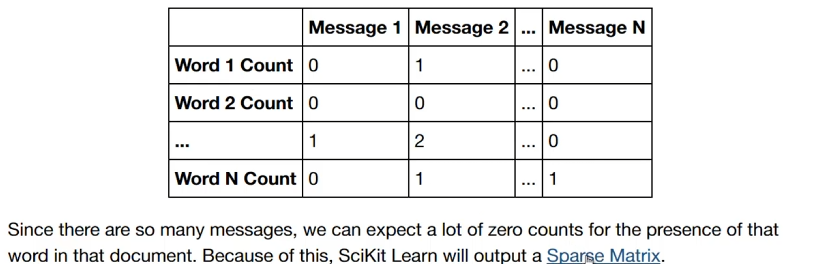

In [79]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

In [80]:
messages = pd.read_csv('messages.csv')

In [81]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [82]:
import string
from nltk.corpus import stopwords

def text_process(mess):

    '''
    1. remove punctuation
    2. remove stopwrods
    3. return list of clean text
    '''

    _clean = [c for c in mess if c not in string.punctuation]
    
    _clean = ''.join(_clean)

    return [word for word in _clean.split() if word.lower() not in stopwords.words('english')]

In [83]:
#use count vectorizer to fit it onto our processed messages
bow_trasformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [84]:
print(len(bow_trasformer.vocabulary_)) #total unique words

11425


In [85]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [86]:
#can now use trasnformer to trasform sentences
bow4 = bow_trasformer.transform(['mess4'])
print(bow4) # array of word (number of occurance, word index)

In [87]:
messages_bow = bow_trasformer.transform(messages['message'])

In [88]:
print(f'Shape of Sparse Matric: {messages_bow.shape}')

Shape of Sparse Matric: (5572, 11425)


In [89]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])) #nnz -> nonzero
print(f'Sparsity: {sparsity}')

Sparsity: 0.07940295412668218


In [90]:
from sklearn.feature_extraction.text import TfidfTransformer

In [91]:
tfidf_trasformer = TfidfTransformer().fit(messages_bow)

In [92]:
tfidf_trasformer.idf_[bow_trasformer.vocabulary_['university']]
# inverse document fq of university

8.527076498901426

In [93]:
messages_tfidf = tfidf_trasformer.transform(messages_bow)

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
spam_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [96]:
pred = spam_model.predict(messages_tfidf)

#### instead of doing all this manually you can use a pipeline

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

In [99]:
#list of everything you want to do (name, what to do)
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
    # You may use any classifir you want like Random Forest etc.

])

In [100]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002B12E972B60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [101]:
pred = pipeline.predict(msg_test)

In [102]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       965
        spam       1.00      0.68      0.81       150

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115

